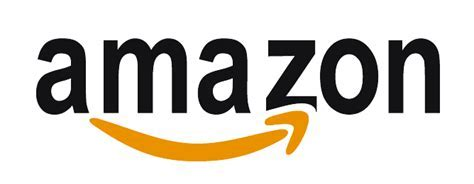

# <span style="color: cyan;">Amazon Sales Analysis </span>

## <span style="color: cyan;">🔖Objective </span>

The primary objective of this project is to analyze Amazon sales data to uncover insights and trends that can drive strategic decision-making. The analysis will focus on understanding sales performance across different regions, countries, and item types, as well as evaluating the impact of various factors such as sales channels, order priority, and shipping times on overall sales, revenue, costs, and profit.

## <span style="color: cyan;">🔖Data Overview </span>

**The dataset comprises several key features, each contributing to a comprehensive view of Amazon's sales operations. Below is a description of each feature:**



- **Region**: The geographical region where the sale occurred.
- **Country**: The specific country within the region where the order was placed.
- **Item Type**: The category of the item sold (e.g., electronics, clothing, etc.).
- **Sales Channel**: The medium through which the sale was made (e.g., online, offline).
- **Order Priority**: The priority level of the order (e.g., high, medium, critical, low).
- **Order Date**: The date when the order was placed.
- **Order ID**: A unique identifier for the order.
- **Ship Date**: The date when the order was shipped.
- **Units Sold**: The number of units sold in the order.
- **Unit Price**: The price per unit of the item sold.
- **Unit Cost**: The cost per unit of the item sold.
- **Total Revenue**: The total revenue generated from the order (calculated as Units Sold * Unit Price).
- **Total Cost**: The total cost incurred for the order (calculated as Units Sold * Unit Cost).
- **Total Profit**: The total profit earned from the order (calculated as Total Revenue - Total Cost). 

## <span style="color: cyan;">🔖Import Libraries </span>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

## <span style="color: cyan;">🔖Exploring the Dataset </span>

In [22]:
df=pd.read_csv("Amazon Sales data.csv")

In [23]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [24]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


> ***Note*** - The Dataset contains 100 records with 5 Categorical variables and 6 Numerical variables with "Order Date" & "Ship Date" likely represents the Dates.

In [26]:
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Order ID,100.0,555020412.4,260615257.1,114606559.0,338922488.0,557708561.0,790755080.8,994022214.0
Units Sold,100.0,5128.7,2794.5,124.0,2836.2,5382.5,7369.0,9925.0
Unit Price,100.0,276.8,235.6,9.3,81.7,179.9,437.2,668.3
Unit Cost,100.0,191.0,188.2,6.9,35.8,107.3,263.3,525.0
Total Revenue,100.0,1373487.7,1460028.7,4870.3,268721.2,752314.4,2212044.7,5997055.0
Total Cost,100.0,931805.7,1083938.3,3612.2,168868.0,363566.4,1613869.7,4509794.0
Total Profit,100.0,441682.0,438537.9,1258.0,121443.6,290768.0,635828.8,1719922.0


In [27]:
df.describe(include='object').T

,count,unique,top,freq
Region,100,7,Sub-Saharan Africa,36
Country,100,76,The Gambia,4
Item Type,100,12,Clothes,13
Sales Channel,100,2,Offline,50
Order Priority,100,4,H,30
Order Date,100,100,5/28/2010,1
Ship Date,100,99,11/17/2010,2


In [28]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [29]:
df.duplicated().sum()

0

## <span style="color: cyan;">🔖Exploratory Data Analysis</span>

In [30]:
#Separating the features into categorical and numerical
nums=[col for col in df.columns if df[col].dtype!="O"]
cats=[col for col in df.columns if df[col].dtype=="O"]

In [31]:
df[cats].head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,6/27/2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,9/15/2012
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,5/8/2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,7/5/2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,2/6/2013


In [32]:
df[nums].head()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,5062,651.21,524.96,3296425.02,2657347.52,639077.50


### <span style="color: cyan;">🔖Univariate Analysis</span>

In [33]:
#Defining functions for plots
def Histplot(col, df,binsize):
    plt.figure(figsize=(10,5))
    sns.set_style("white")
    sns.histplot(df[col],bins=binsize,edgecolor='black', kde=True, color='skyblue').lines[0].set_color('red')
    plt.title(f'Distribution of {col}',color='brown')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

def Boxplot(nums,df):
    fig,axes=plt.subplots(nrows=1,ncols=len(nums[1:]),figsize=(20,8))
    for i, nums in enumerate(nums[1:]):
        sns.boxplot(y=df[nums],ax=axes[i],color='skyblue')
        axes[i].set_title(nums,color="red")
    plt.tight_layout()
    plt.show()

def Countplot(col,df,height,width):
    plt.figure(figsize=(height,width))
    ax=sns.countplot(y=df[col],palette="winter",order=df[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(f'Countplot of {col}',color='r',fontsize=16)
    plt.show()


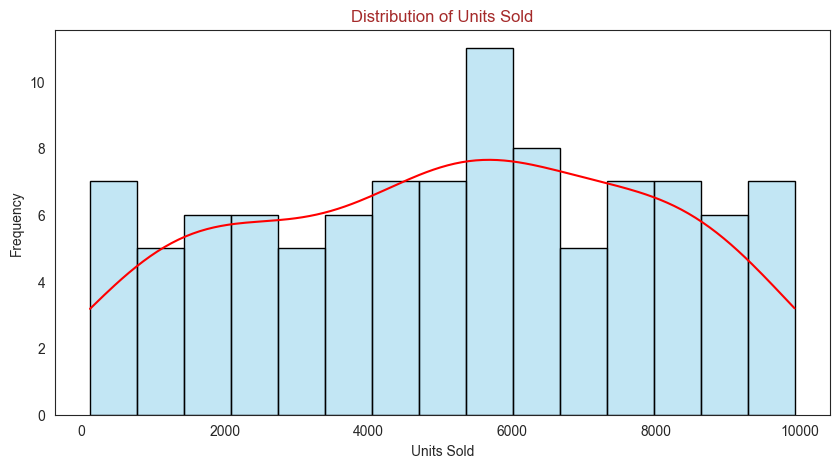

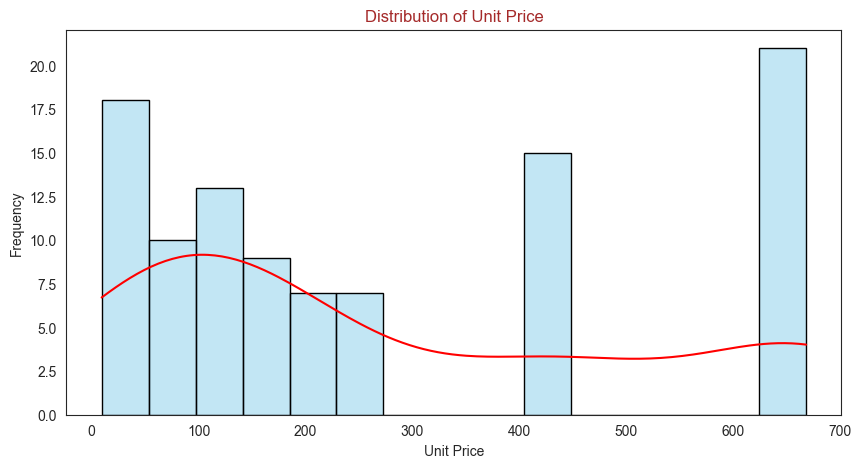

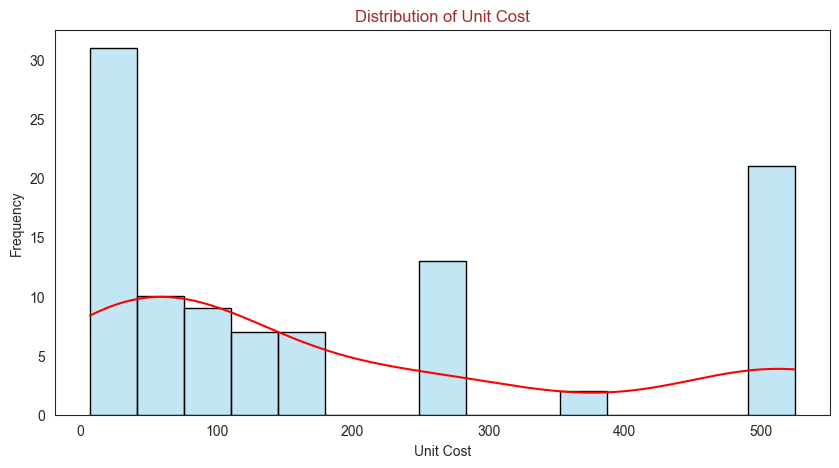

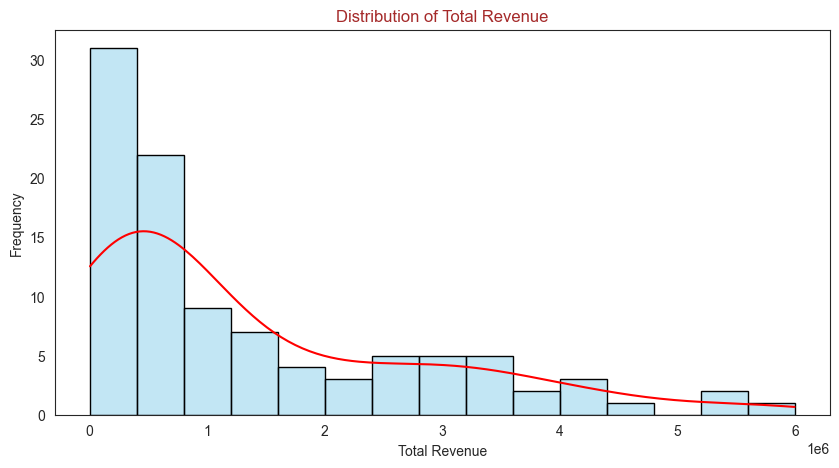

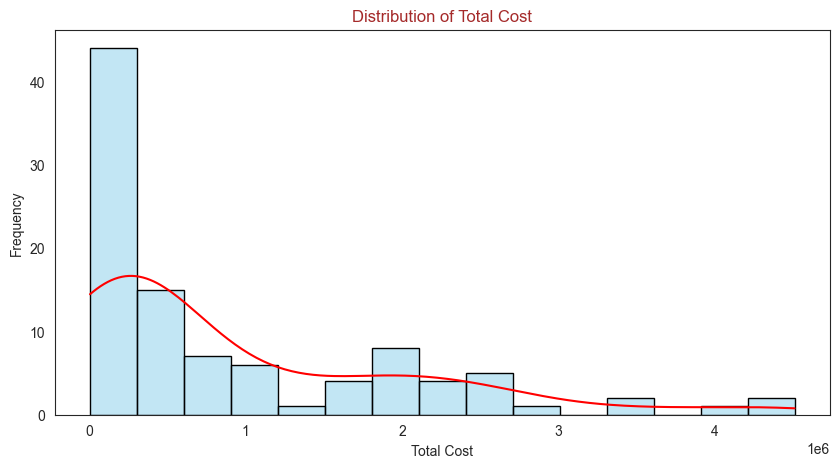

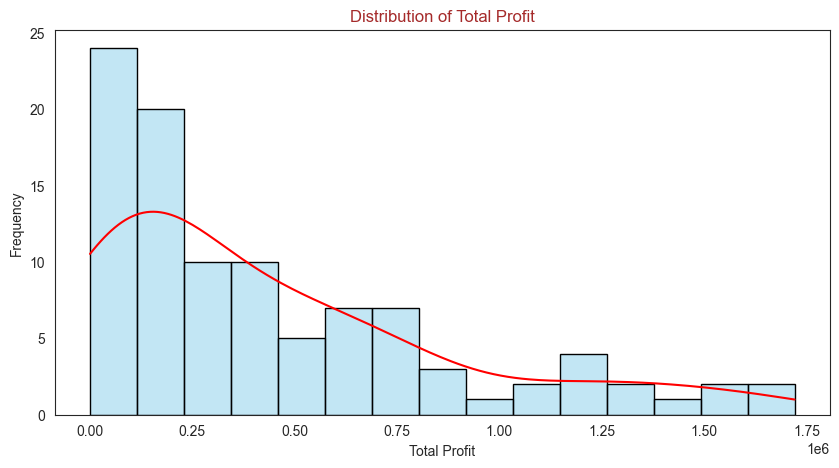

In [34]:
#Visualizing the Distrbution of Numerical features
for cols in nums[1:]:
    Histplot(cols,df,15)
    plt.show()

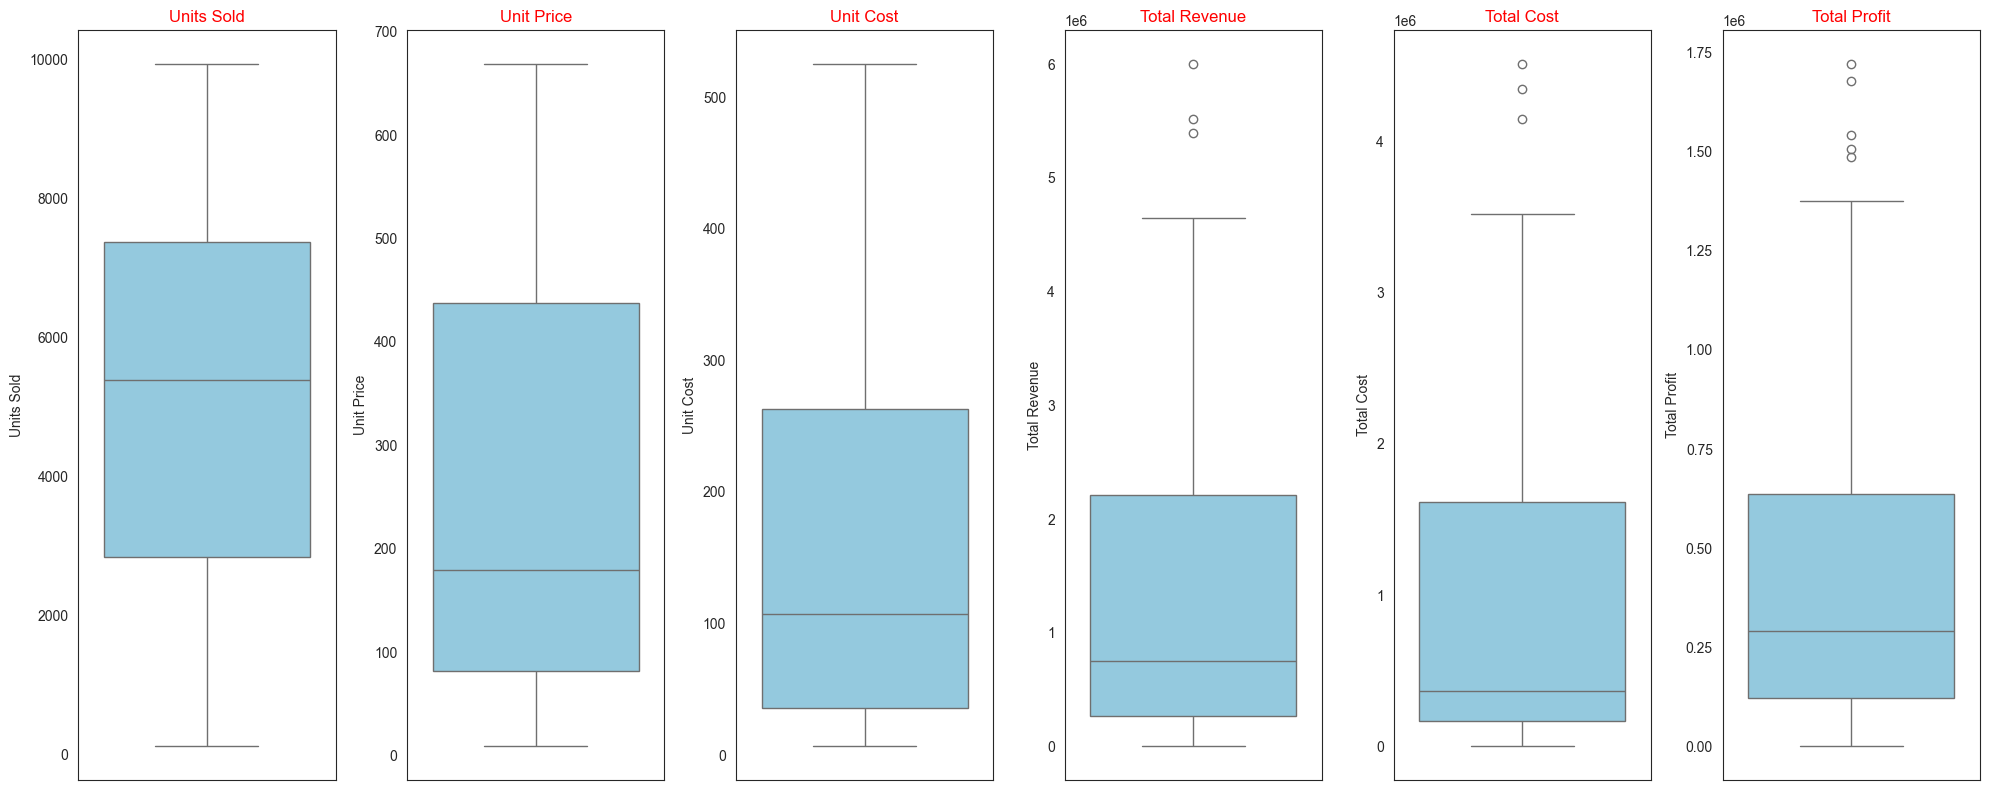

In [35]:
#Visualizing the Boxplot of Features
Boxplot(nums,df)

> ***Note*** 

- The median units sold is approximately 6000, with a relatively symmetrical distribution and no outliers.
- Unit price has a median of about 300, showing significant variability but no outliers, and a symmetrical distribution.
- Unit cost, with a median of around 100, also displays significant variability, a symmetrical distribution, and no outliers.
- Total revenue has a median of approximately 2,000,000, is right-skewed, and includes high-value outliers.
- Total cost, with a median near 1,000,000, is similarly right-skewed and has several high-value outliers.
- Total profit shows a median of about 250,000, is right-skewed, and contains notable high-value outliers, indicating instances of exceptionally high profits.

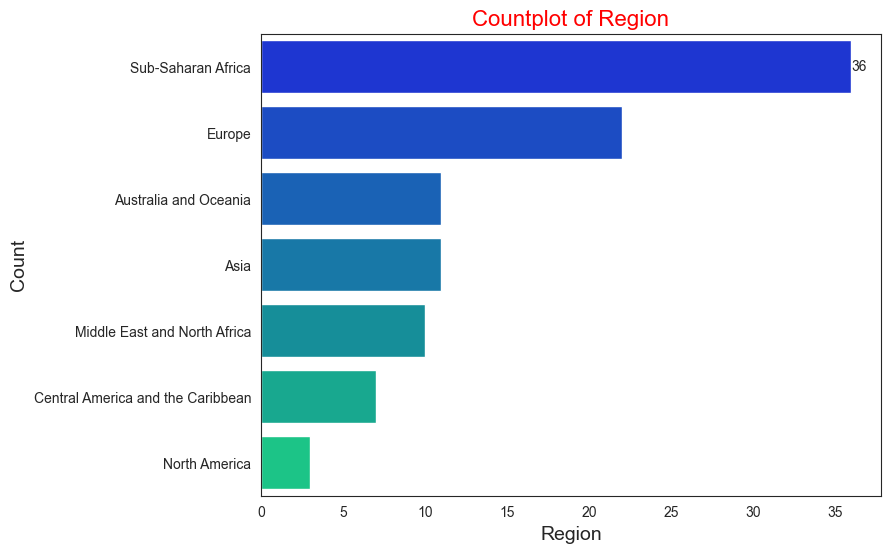

In [40]:
Countplot("Region",df,8,6)

> ***Note***
- The majority of the orders come from Sub-Saharan Africa and Europe.
- North America contributes the least to Amazon's orders.

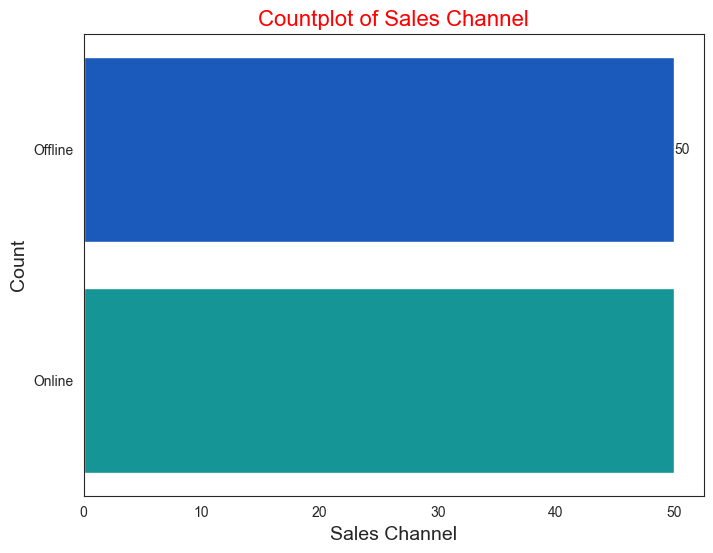

In [37]:
Countplot("Sales Channel",df,8,6)

> ***Note***
- The number of orders placed through offline and online sales channels is equal, each accounting for 50%.

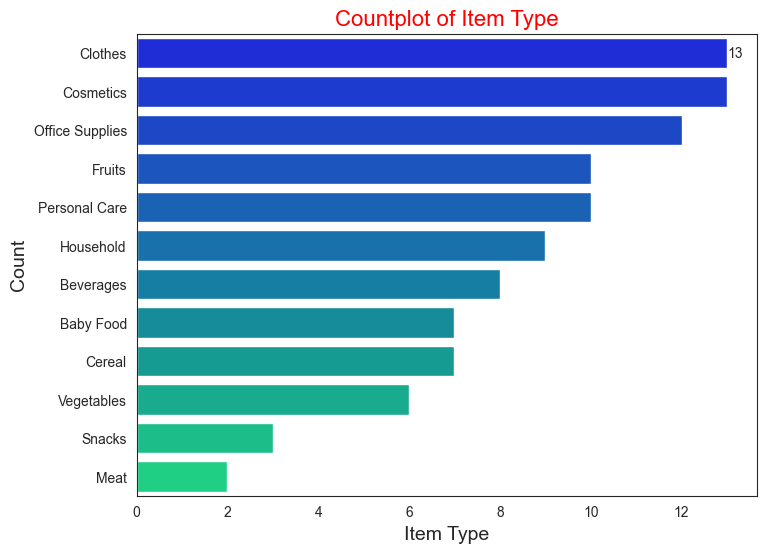

In [38]:
Countplot("Item Type",df,8,6)

> ***Notes***
- Clothes: The highest count of items belongs to the Clothes category, with a total of 13 items.
- The snacks and meat categories have fewer products.

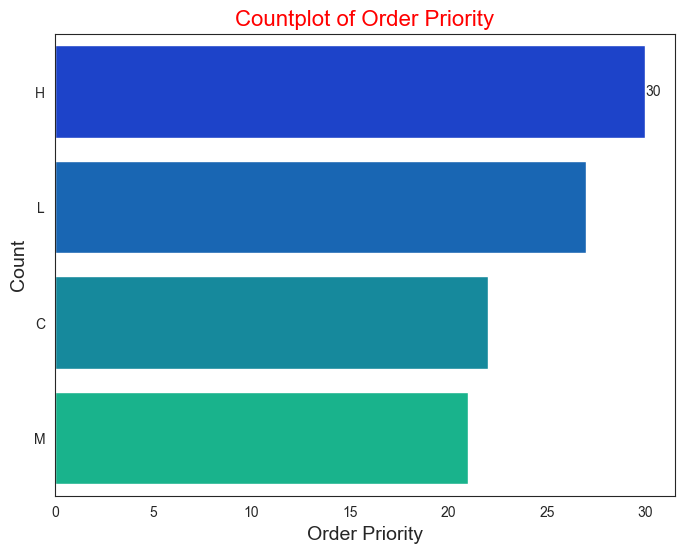

In [39]:
Countplot('Order Priority',df,8,6)

> ***Notes***
- The distribution of orders across priority levels—high, low, medium, and critical—is roughly equal.

### <span style="color: cyan;">🔖Feature Engineering</span>

In [ ]:
#Convert the Dtype of "Order Date" and "Ship Date" object to Datetime
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [ ]:
#Create new Features "Order Month" and "Order Year"
df["Order Month"]=df['Order Date'].dt.month
df['Order Year']=df['Order Date'].dt.year

### <span style="color: cyan;">🔖Bivariate Analysis</span>

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


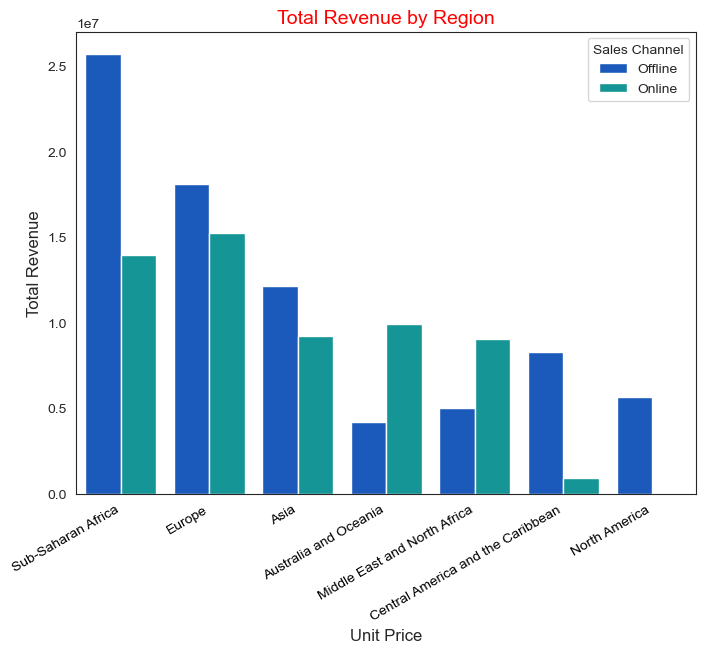

,Region,Total Revenue
6,Sub-Saharan Africa,39672031.43
3,Europe,33368932.11
0,Asia,21347091.02
1,Australia and Oceania,14094265.13
4,Middle East and North Africa,14052706.58
2,Central America and the Caribbean,9170385.49
5,North America,5643356.55


In [ ]:
Rev_by_region = df.groupby("Region")["Total Revenue"].sum().reset_index().sort_values(by="Total Revenue", ascending=False)

rev_order= df.groupby('Region')["Total Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
rev_reg=sns.barplot(x="Region",y="Total Revenue",data=df,estimator="sum",errorbar=None,order=rev_order.index,hue="Sales Channel", palette="winter")
plt.title('Total Revenue by Region',color='r',fontsize=14)
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(ha='right',rotation=30,color='black')
plt.show()
Rev_by_region


> ***Note***
- Sub-Saharan Africa is the top revenue generator, with offline sales leading over online sales.
- North America contributes the least to revenue generation.
- In most regions, offline sales are preferred over online sales.

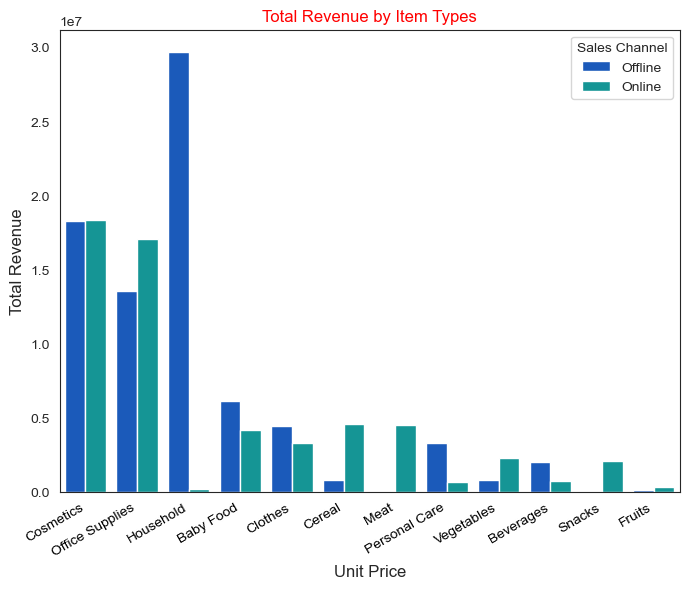

,Item Type,Total Revenue
4,Cosmetics,36601509.60
8,Office Supplies,30585380.07
6,Household,29889712.29
0,Baby Food,10350327.60
3,Clothes,7787292.80
2,Cereal,5322898.90
7,Meat,4503675.75
9,Personal Care,3980904.84
11,Vegetables,3089057.06
1,Beverages,2690794.60


In [ ]:
Rev_by_items = df.groupby("Item Type")["Total Revenue"].sum().reset_index().sort_values(by="Total Revenue", ascending=False)

rev_order= df.groupby('Item Type')["Total Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x="Item Type",y="Total Revenue",data=df,estimator="sum",errorbar=None,order=rev_order.index,hue="Sales Channel", palette="winter")
plt.title('Total Revenue by Item Types',color='r')
plt.xlabel('Unit Price', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(ha='right',rotation=30,color='black')
plt.show()
Rev_by_items


> ***Note***
- Cosmetics, office supplies and Household products contribute significantly to overall revenue.
- Fruits contribute to lower revenue generation.


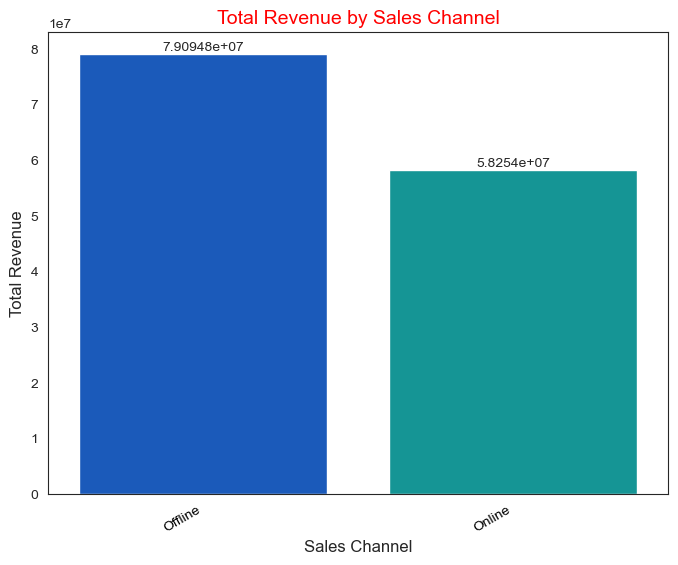

In [ ]:
plt.figure(figsize=(8,6))
ret=sns.barplot(x="Sales Channel",y="Total Revenue",data=df,estimator="sum",errorbar=None, palette="winter")
ret.bar_label(ret.containers[0])
plt.title('Total Revenue by Sales Channel',color='r',fontsize=14)
plt.xlabel('Sales Channel', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(ha='right',rotation=30,color='black')
plt.show()

> ***Notes***
- Offline sales are mostly preffered over Online Sales.

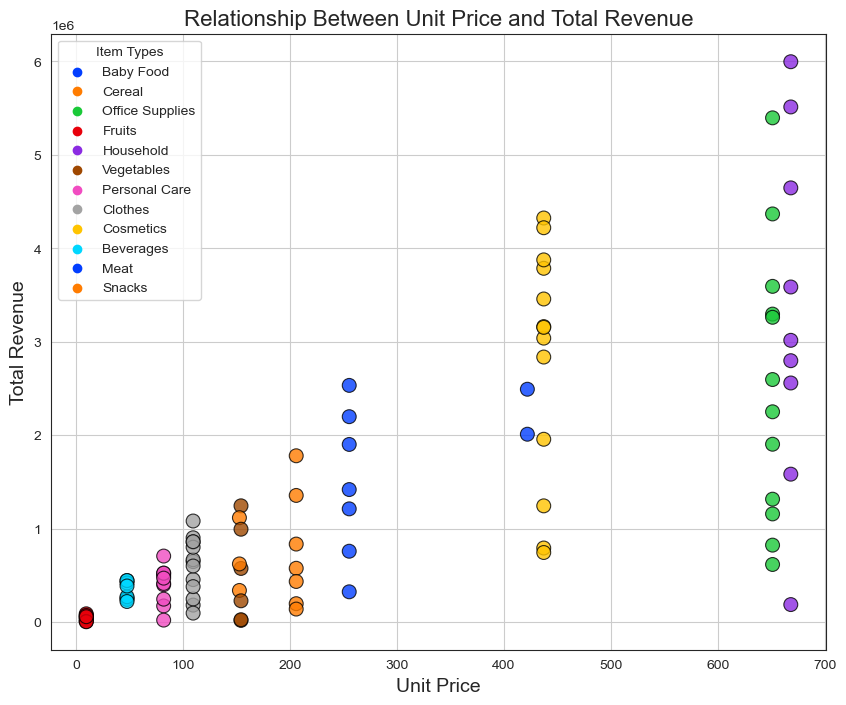

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Unit Price", y="Total Revenue", hue="Item Type", palette="bright", s=100, edgecolor="black", alpha=0.8)
plt.title('Relationship Between Unit Price and Total Revenue', fontsize=16)
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Item Types')
plt.grid(True)
plt.show()


> ***Note***
- There is a positive correlation between unit price and total revenue, which is expected because higher priced items can generate higher revenue.
- Items like Clothes, Household, and \Cosmetics are scattered across various unit prices, showing a wide range of revenue generation.
- Items like Meat and Snacks appear less frequently and are mostly at lower unit prices, indicating lower total revenue.

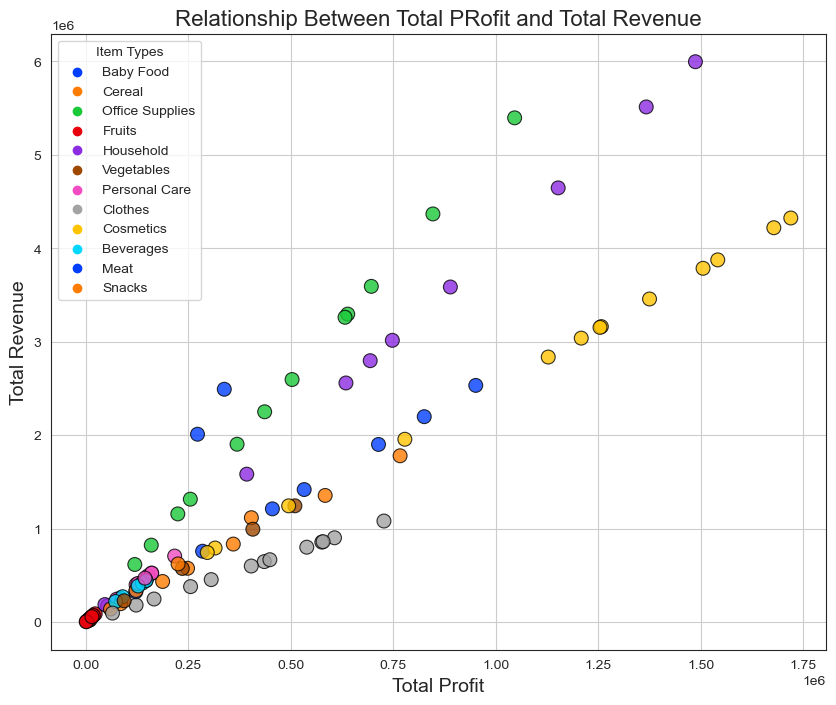

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Total Profit", y="Total Revenue", hue="Item Type", palette="bright", s=100, edgecolor="black", alpha=0.8)
plt.title('Relationship Between Total PRofit and Total Revenue', fontsize=16)
plt.xlabel('Total Profit', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Item Types')
plt.grid(True)
plt.show()


> ***Note***
- Household items, office supplies, and cosmetics generate the highest profits compared to other products. 

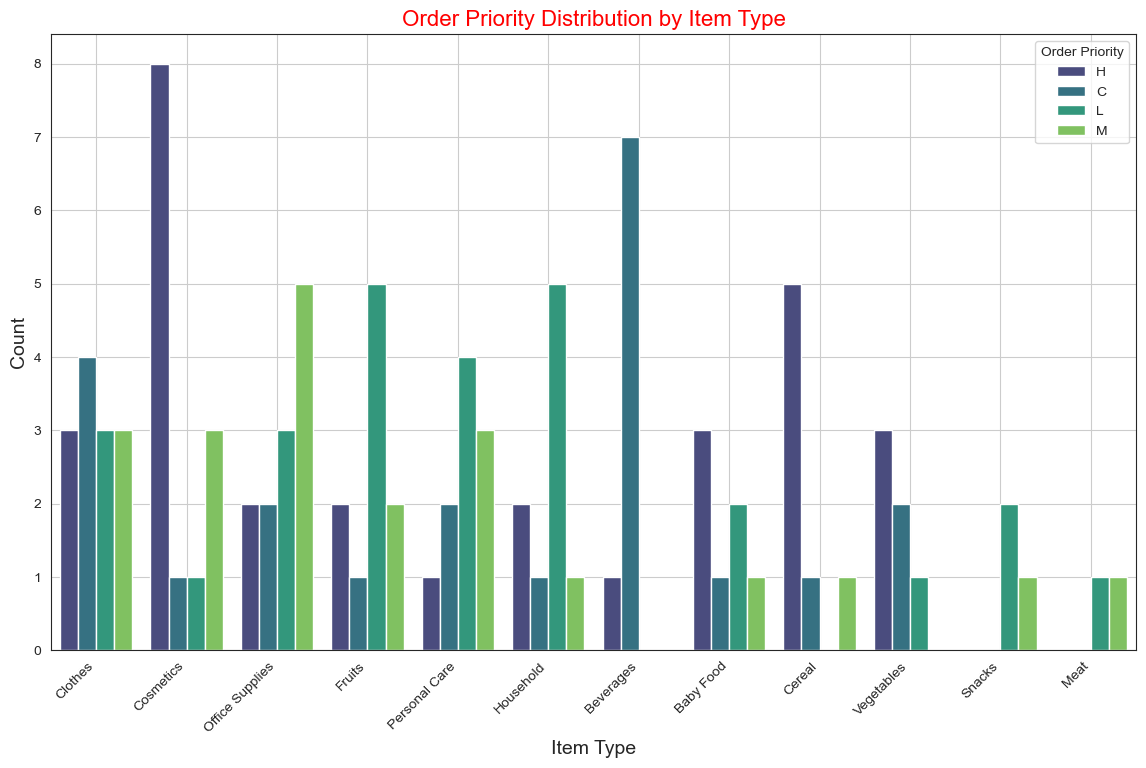

In [ ]:
order_items= df['Item Type'].value_counts().index

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="Item Type", hue="Order Priority", palette="viridis", order=order_items)
plt.title('Order Priority Distribution by Item Type',fontsize=16,color='red')
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Order Priority')
plt.grid(True)
plt.show()


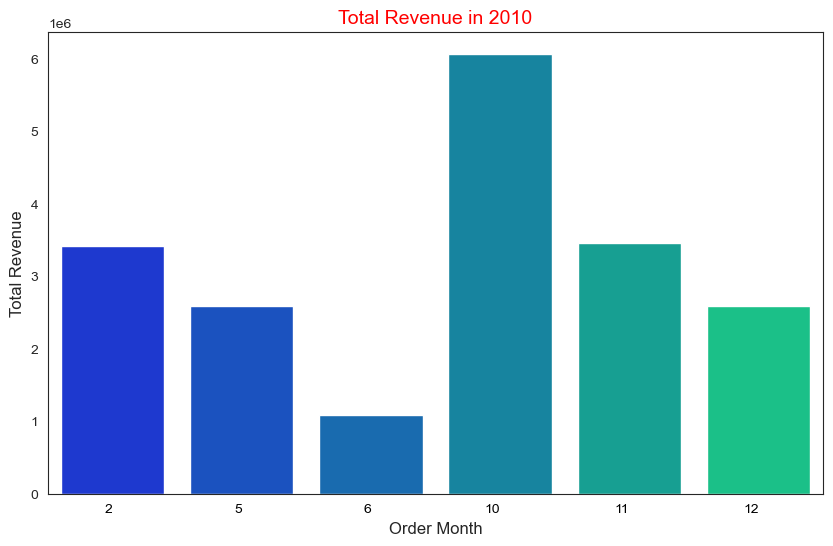

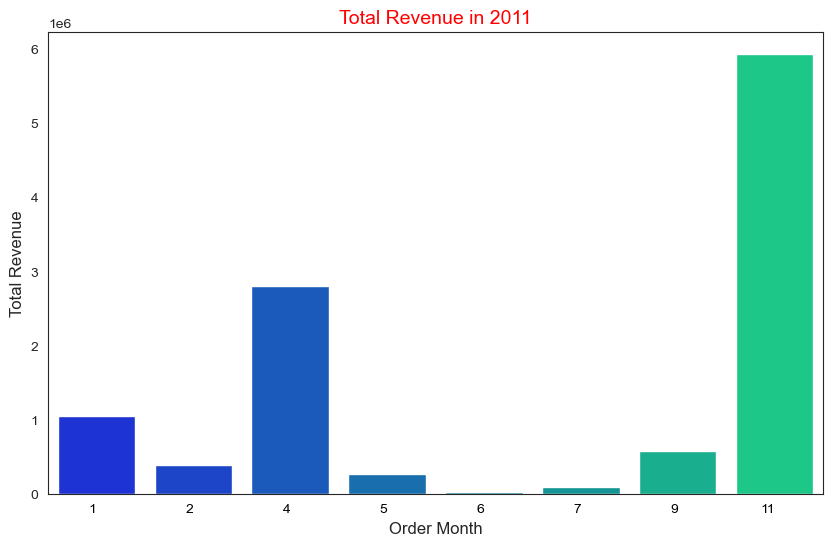

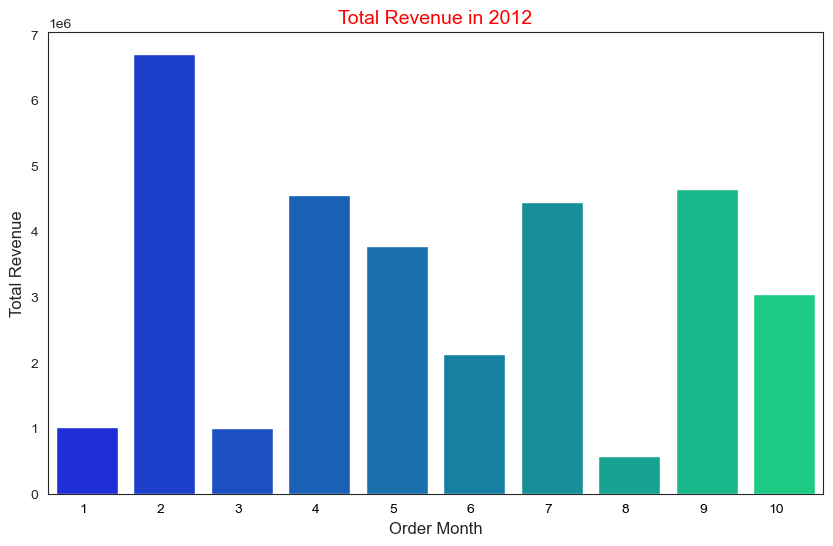

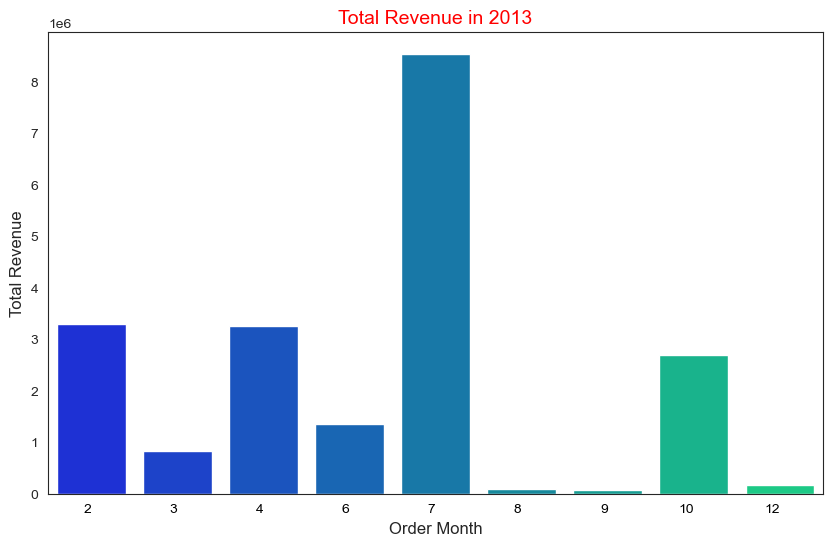

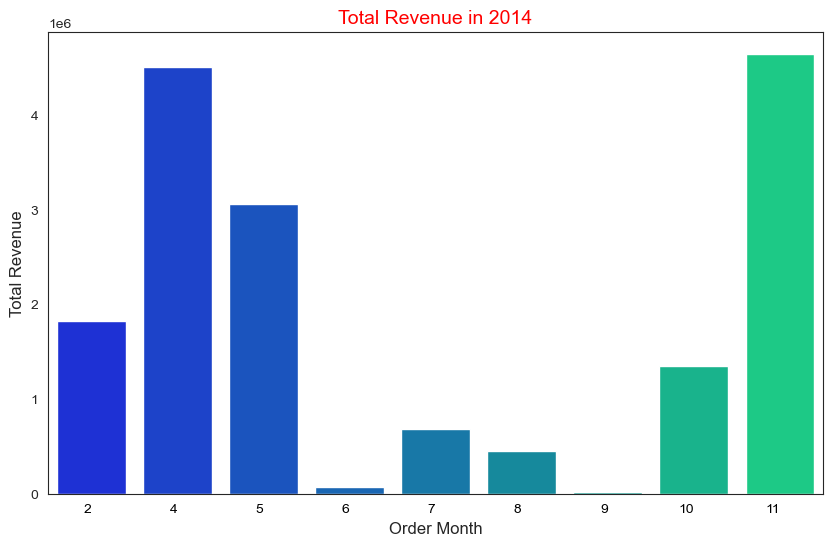

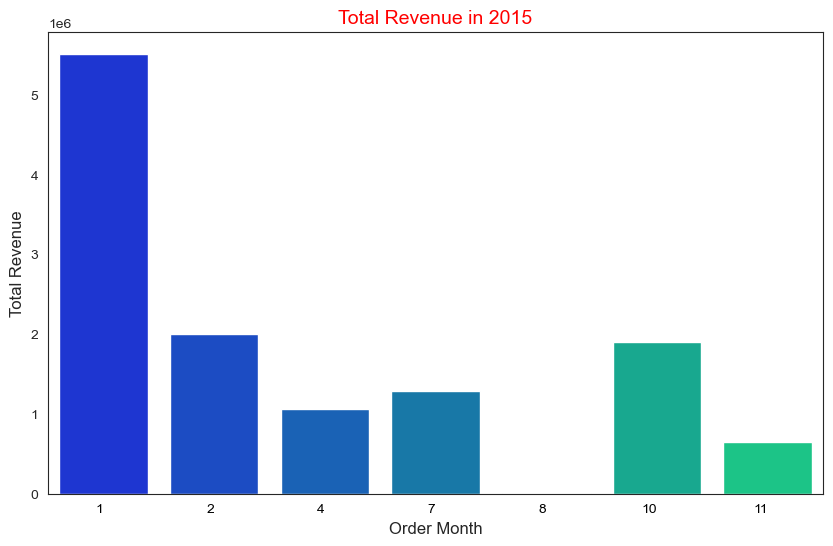

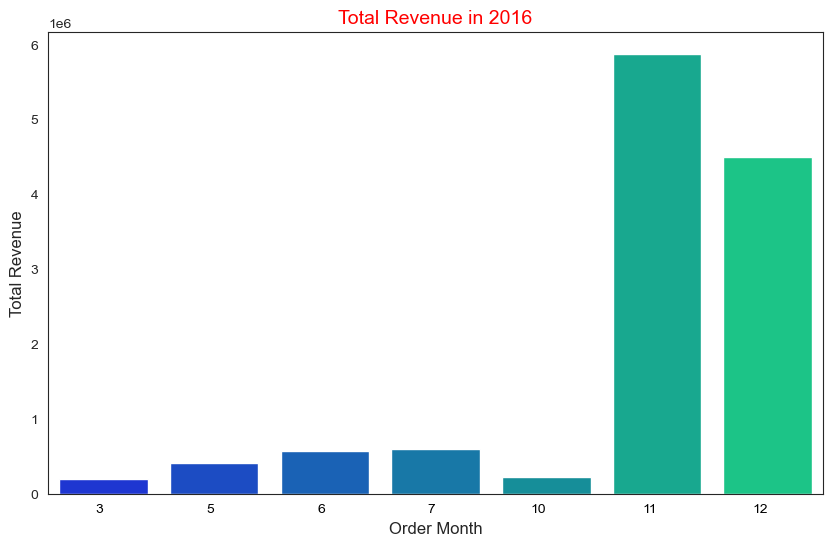

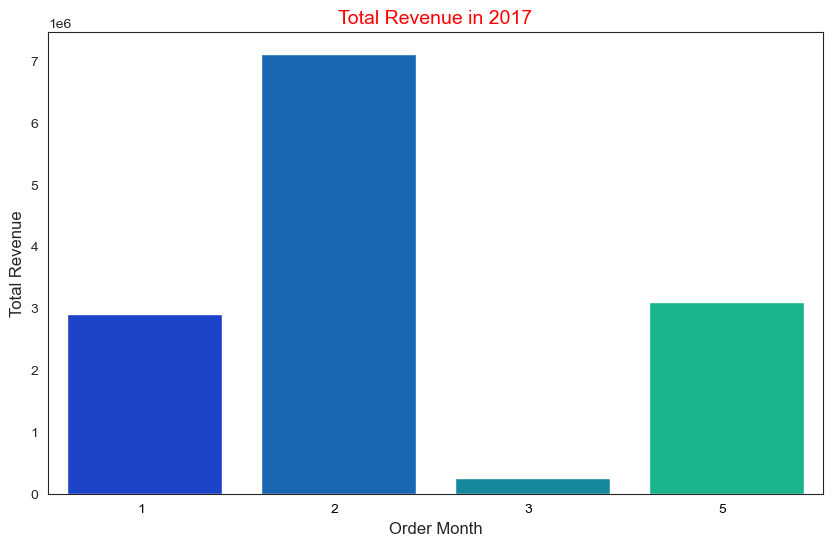

In [ ]:
sales_year=np.sort(df['Order Year'].unique())
for i in sales_year:
    plt.figure(figsize=(10,6))
               
    sns.barplot(x='Order Month',y='Total Revenue',data=df[df['Order Year']==i],estimator="sum",errorbar=None, palette="winter")
    plt.title(f'Total Revenue in {i}',color='r',fontsize=14)
    plt.xlabel('Order Month', fontsize=12)
    plt.ylabel('Total Revenue', fontsize=12)
    plt.xticks(ha='right',color='black')
    
    plt.show()

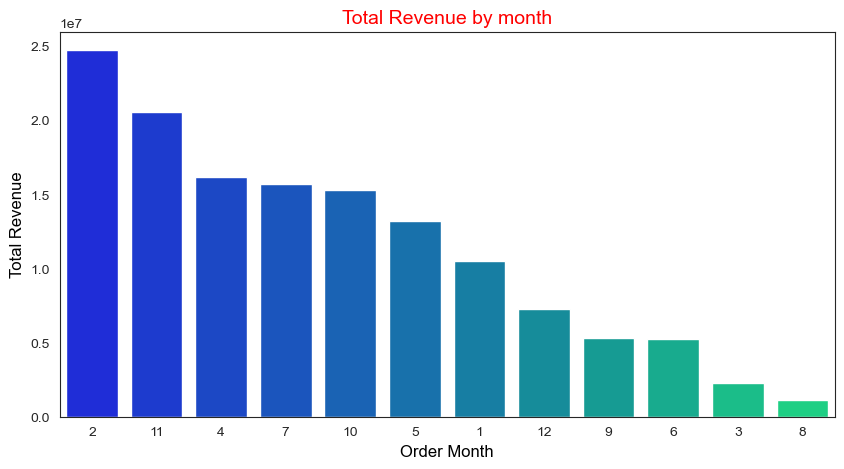

In [ ]:
order_by_month=df.groupby('Order Month')['Total Revenue'].sum().sort_values(ascending=False).index

plt.figure(figsize=(10,5))
sns.barplot(x='Order Month',y='Total Revenue',data=df,estimator='sum',errorbar=None,order=order_by_month,palette='winter')
plt.title('Total Revenue by month',color='r',fontsize=14)
plt.xlabel('Order Month',color='black',fontsize=12)
plt.ylabel('Total Revenue',color='black',fontsize=12)
plt.show()

> ***Note***
- The month of February witnessed the highest overall revenue.
- The month of August had the lowest sales generation. 

### <span style="color: cyan;">🔖Customer Segmentation</span>

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


In [ ]:
features_cls=df[['Units Sold','Total Revenue']]

scaler=StandardScaler()
scaled_df=scaler.fit_transform(features_cls)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_df)
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year,Segment
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010,3
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012,2
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014,2
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014,0
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013,1


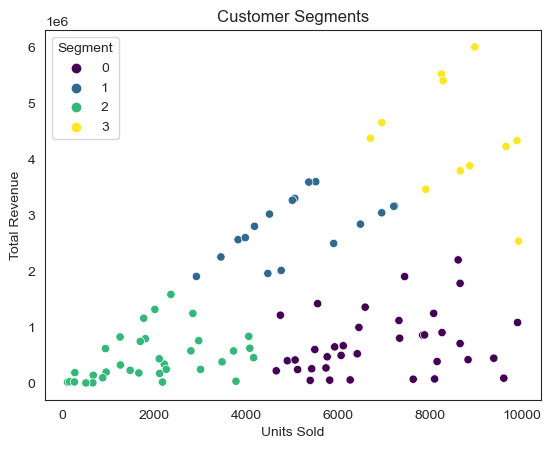

In [ ]:
sns.scatterplot(x='Units Sold', y='Total Revenue', hue='Segment', data=df, palette='viridis')
plt.title('Customer Segments')
plt.show()

### <span style="color: cyan;">🔖Conclusion</span>

↪ The detailed analysis of Amazon's sales data has provided valuable insights that can inform strategic decision-making and drive future growth. The analysis revealed a total revenue of 137.35M and a profit of 44.17M, resulting in a robust profit margin of 32.16%. Key regions such as Sub-Saharan Africa and Europe stand out as significant contributors to revenue, while product categories like cosmetics and clothes lead in both sales volume and profit margins.

↪ However, the analysis also identified areas needing improvement. Regions like Central America and the Caribbean, as well as the Middle East and North Africa, are underperforming. Similarly, product categories such as snacks and fruits show lower revenue and sales volumes. Shipping logistics require optimization, particularly for products like clothes, which have the longest shipping times.

↪ The sales channel analysis indicates a stronger performance from offline sales compared to online sales, highlighting potential for enhancing online sales strategies. The order priority data emphasizes the importance of managing high and critical priority orders to maximize revenue and profitability.

↪ In summary, while Amazon's sales performance is strong, the analysis highlights clear opportunities for further optimization. By leveraging the strengths of high-performing regions and products, addressing underperforming areas, and optimizing logistics and sales strategies, Amazon can continue to enhance its market position and achieve sustained growth. The insights uncovered through this analysis demonstrate the value of data-driven decision-making in identifying and capitalizing on these opportunities.

#### Key Metrices and Insights

- **Regions and Sales**: Sales were spread across various regions, with notable entries from Australia and Oceania, Central America and the Caribbean, Europe, and Sub-Saharan Africa.
- **Units Sold**: The number of units sold per order varied widely, with a mean of approximately 5129 units.
- **Total Revenue and Profit** : Revenue and profit showed significant variability based on item type and region. The highest revenue reached nearly 6 million, while the highest profit was about 1.72 million.
